# Task 1: Bernoulli Simulation

1. Objective: Perform a series of Bernoulli simulations (varying two values described below) and visualizations of the sample mean.

2. Instructions:

First Variable: Number of observations in a single simulation, with values [10, 100, 1000, 10000].
Second Variable: Number of times to run a Bernoulli simulation (with p=0.7) for each set of observations, with values [10, 100, 1000, 10000].
For each combination of values, simulate the dataset. For each combination of variables, record the sample mean for each run as its own dataset. Example: For 100 runs of a 10 observation Bernoulli dataset, generate a dataset where each of the 100 rows consists of the sample mean from a different run with 10 observations.
Submit each of these sample mean datasets as a separate CSV file. Each file should contain one mean per line.
3. Visualization and Interpretation:

Produce a visualization of the distribution of sample means for each dataset created.
Include a brief commentary as a comment in your Python notebook about the trends you observe as the number of runs and number of observations vary.

In [2]:
import numpy as np
import pandas as pd
import os

In [ ]:


# Set parameters
num_observations_list = [10, 100, 1000, 10000]
num_simulations_list = [10, 100, 1000, 10000]
p = 0.7  # Probability of success in Bernoulli trials

# Directory to save CSV files
output_dir = "bernoulli_simulations"

# Run simulations and save to CSV
file_paths = [] 

for num_obs in num_observations_list:
    for num_sim in num_simulations_list:
        # Generate the sample means for each simulation
        sample_means = [np.mean(np.random.binomial(1, p, num_obs)) for _ in range(num_sim)]
        
        # Create DataFrame
        df = pd.DataFrame(sample_means, columns=["Sample Mean"])
        
        # Define filename
        filename = f"bernoulli_means_obs{num_obs}_sim{num_sim}.csv"
        file_path = os.path.join(output_dir, filename)
        file_paths.append(file_path)
        
        # Save to CSV
        df.to_csv(file_path, index=False)

file_paths


['bernoulli_simulations\\bernoulli_means_obs10_sim10.csv',
 'bernoulli_simulations\\bernoulli_means_obs10_sim100.csv',
 'bernoulli_simulations\\bernoulli_means_obs10_sim1000.csv',
 'bernoulli_simulations\\bernoulli_means_obs10_sim10000.csv',
 'bernoulli_simulations\\bernoulli_means_obs100_sim10.csv',
 'bernoulli_simulations\\bernoulli_means_obs100_sim100.csv',
 'bernoulli_simulations\\bernoulli_means_obs100_sim1000.csv',
 'bernoulli_simulations\\bernoulli_means_obs100_sim10000.csv',
 'bernoulli_simulations\\bernoulli_means_obs1000_sim10.csv',
 'bernoulli_simulations\\bernoulli_means_obs1000_sim100.csv',
 'bernoulli_simulations\\bernoulli_means_obs1000_sim1000.csv',
 'bernoulli_simulations\\bernoulli_means_obs1000_sim10000.csv',
 'bernoulli_simulations\\bernoulli_means_obs10000_sim10.csv',
 'bernoulli_simulations\\bernoulli_means_obs10000_sim100.csv',
 'bernoulli_simulations\\bernoulli_means_obs10000_sim1000.csv',
 'bernoulli_simulations\\bernoulli_means_obs10000_sim10000.csv']

In [3]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

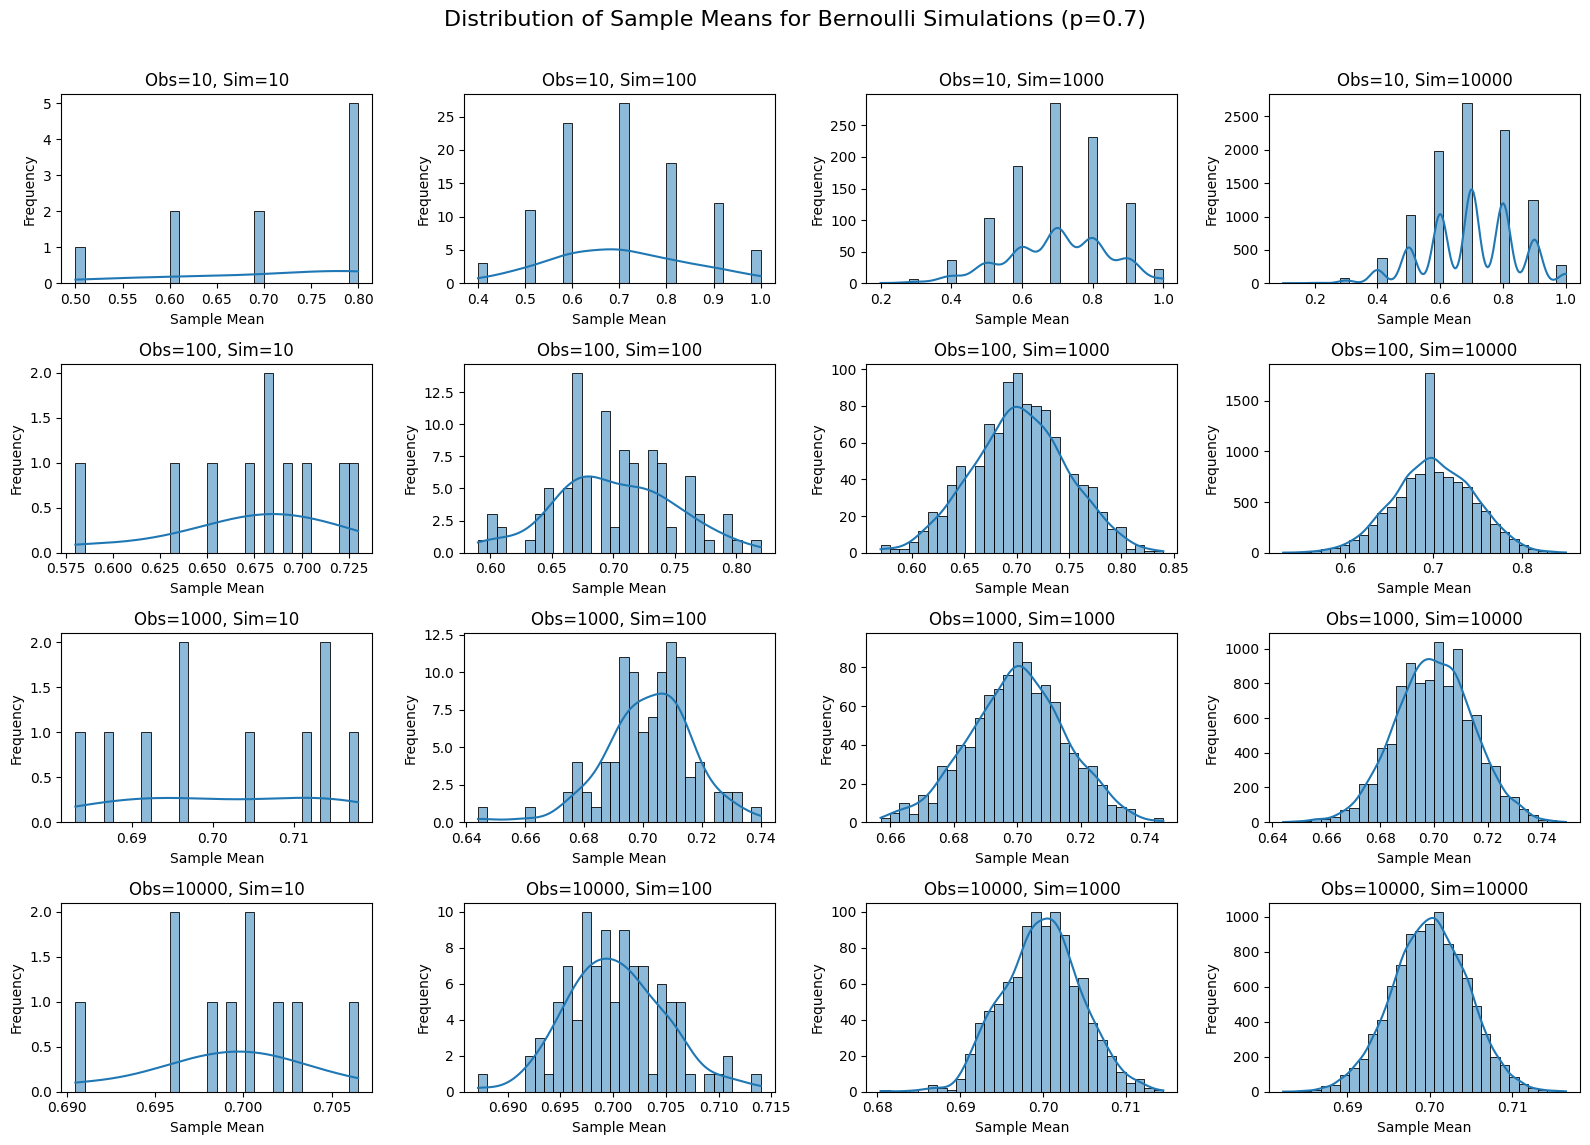

In [5]:


# Set up the plot grid
fig, axes = plt.subplots(len(num_observations_list), len(num_simulations_list), figsize=(16, 12))
fig.suptitle("Distribution of Sample Means for Bernoulli Simulations (p=0.7)", fontsize=16)

# Generate histograms for each dataset
for i, num_obs in enumerate(num_observations_list):
    for j, num_sim in enumerate(num_simulations_list):
        # Load the dataset
        filename = f"bernoulli_means_obs{num_obs}_sim{num_sim}.csv"
        file_path = os.path.join(output_dir, filename)
        df = pd.read_csv(file_path)
        
        # Plot histogram
        ax = axes[i, j]
        sns.histplot(df["Sample Mean"], bins=30, kde=True, ax=ax)
        ax.set_title(f"Obs={num_obs}, Sim={num_sim}")
        ax.set_xlabel("Sample Mean")
        ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


**Observed Trends:**

1. *Effect of Increasing Observations (Rows in Grid)*
   - As the number of observations per simulation increases, the sample means become more concentrated around 0.7.
   - More simulations provide a clearer estimate of the sample mean.

2. *Effect of Increasing Simulations (Columns in Grid)*
   - As the number of simulations increases, the histogram becomes smoother and better approximates the true distribution.
   - More simulations provide a clearer estimate of the sample mean distribution.


# Task 2: Analysis of `HW1_dataset1.csv'

1. Visualization:

Create at least one visualization to depict the feature(s) in this dataset.
2. Distribution Modeling:


Select a distribution that you believe models the feature effectively.
Justify your choice in a comment block within your notebook.
3. Parameter Estimation:

Estimate the parameters of your chosen distribution based on the data.
Overlay the estimated distribution on your data visualization for comparison.

In [1]:
# Task 2: Analysis of HW1_dataset1.csv

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB
None

First few rows of the dataset:
   X
0  4
1  6
2  5
3  2
4  5


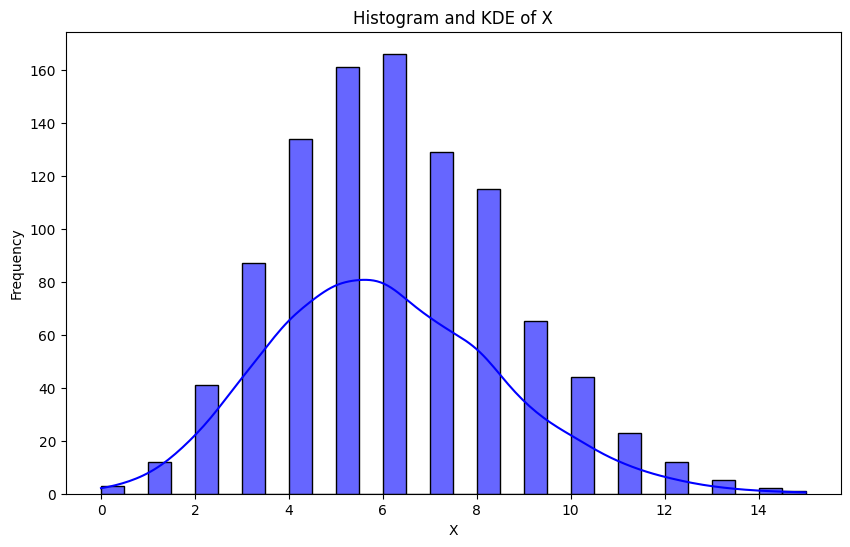

In [3]:

# Load dataset
file_path = "HW1_dataset1.csv"  # Ensure the correct path
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Select the feature column (modify this based on dataset structure)
feature_column = df.columns[0]  # Assuming first column is the feature
data = df[feature_column]

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.6)
plt.title(f"Histogram and KDE of {feature_column}")
plt.xlabel(feature_column)
plt.ylabel("Frequency")
plt.show()




**Visualization choice:**
- Visualization choice: Normal
- Justification: The histogram is generally symmetric and bell-shaped.

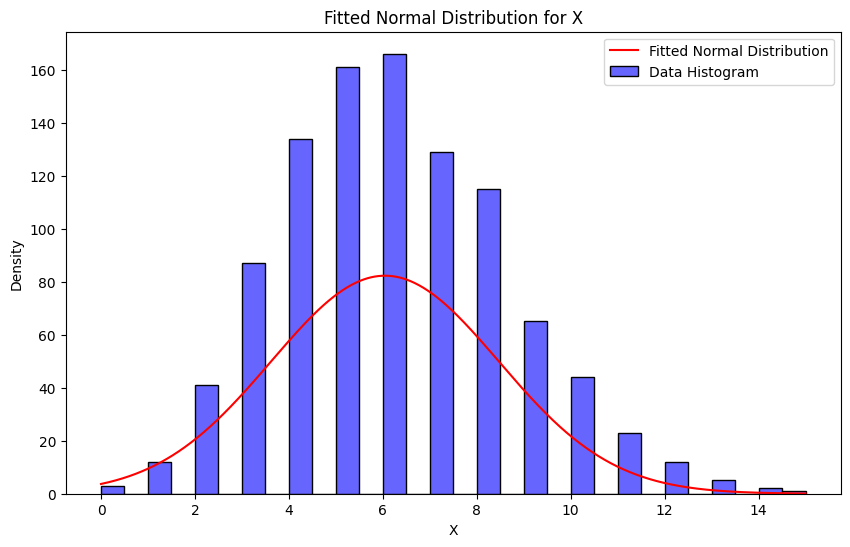

Estimated parameters for Normal Distribution: mu = 6.0450, sigma = 2.4251


In [4]:

# Fit a normal distribution (modify if another distribution is more appropriate)
mu, sigma = stats.norm.fit(data)

# Generate a range of values for the fitted distribution
x = np.linspace(min(data), max(data), 1000)
pdf = stats.norm.pdf(x, mu, sigma)

# Overlay the estimated distribution on the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=False, color='blue', alpha=0.6, label="Data Histogram")
plt.plot(x, pdf * len(data) * (max(data) - min(data)) / 30, 'r-', label="Fitted Normal Distribution")
plt.title(f"Fitted Normal Distribution for {feature_column}")
plt.xlabel(feature_column)
plt.ylabel("Density")
plt.legend()
plt.show()

# Print estimated parameters
print(f"Estimated parameters for Normal Distribution: mu = {mu:.4f}, sigma = {sigma:.4f}")

# Task 3: Analysis of `HW1_dataset2.csv`

Instructions are identical to Task 2. Follow the same steps for `HW1_dataset2.csv`.

In [5]:
# Load the dataset
file_path = "HW1_dataset2.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


(None,
     X
 0  60
 1  63
 2  61
 3  59
 4  62)

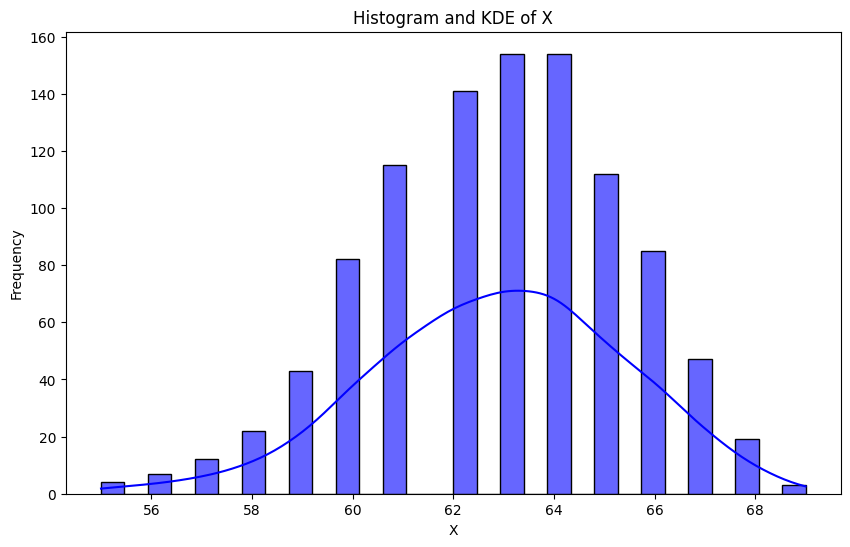

In [6]:
# Extract the feature column
feature_column = "X"
data = df[feature_column]

# --- Step 1: Visualization of the Feature ---
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.6)
plt.title(f"Histogram and KDE of {feature_column}")
plt.xlabel(feature_column)
plt.ylabel("Frequency")
plt.show()


**Visualization choice:**
- Visualization choice: Normal
- Justification: The histogram is generally symmetric and bell-shaped.

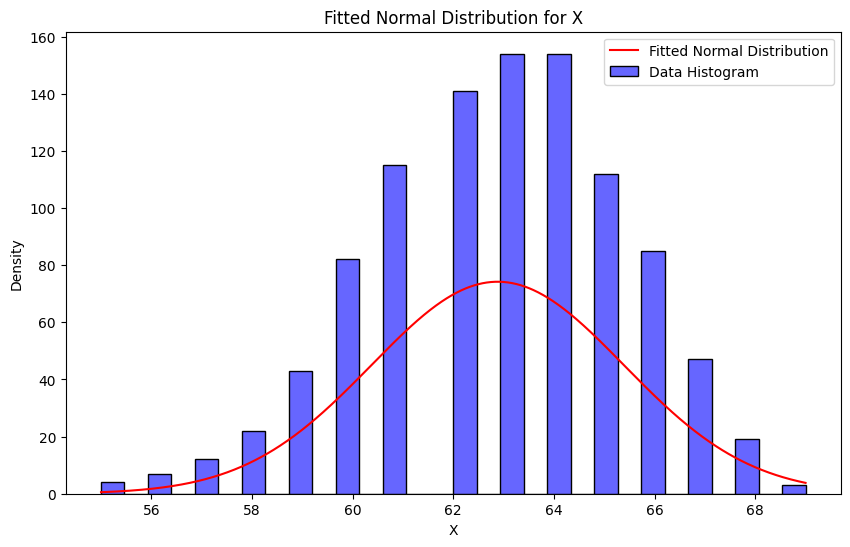

(np.float64(62.882), np.float64(2.509198278335134))

In [7]:

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(data)

# Generate a range of values for the fitted distribution
x = np.linspace(min(data), max(data), 1000)
pdf = stats.norm.pdf(x, mu, sigma)

# Overlay the estimated distribution on the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=False, color='blue', alpha=0.6, label="Data Histogram")
plt.plot(x, pdf * len(data) * (max(data) - min(data)) / 30, 'r-', label="Fitted Normal Distribution")
plt.title(f"Fitted Normal Distribution for {feature_column}")
plt.xlabel(feature_column)
plt.ylabel("Density")
plt.legend()
plt.show()

# Print estimated parameters
mu, sigma


# Task 4: Visualization of `HW1_dataset3.csv`

1. Objective:

Generate a meaningful and clear visualization of the two-feature dataset contained in `HW1_dataset3.csv`.
2. Visualization Considerations:

Your visualization should be informative, showing relationships or patterns between the two features.
Ensure clarity and effectiveness in conveying the data insights.

In [8]:
# Load the dataset
file_path = "HW1_dataset3.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       10000 non-null  float64
 1   Y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


(None,
           X         Y
 0  1.346937  1.236486
 1  0.035394  0.318112
 2  1.037402  2.180105
 3 -0.181728 -1.123108
 4 -0.849702  0.101647)

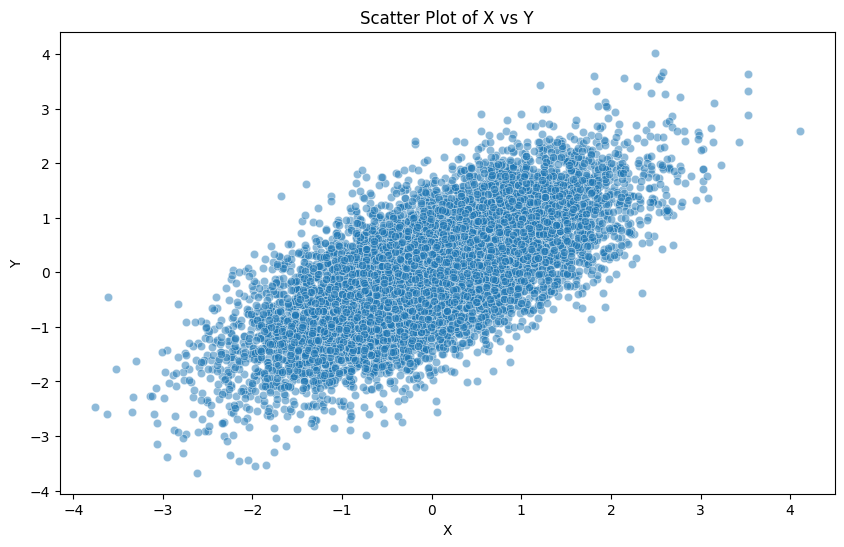

In [9]:
# Scatter Plot to Visualize Relationship Between X and Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["X"], y=df["Y"], alpha=0.5)
plt.title("Scatter Plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
